# Film Script Analyzer, by Luis Castro

## Supervised Learning, Regression

After collecting information, cleaning and processing it in the [data mining](https://github.com/luisecastro/dataInc/blob/master/data_mining.ipynb) section, the next step is to analyze it, obtain insights into structures and patterns.

It is important to select the most relevant features and the most accurate models to perform predictions.

To accomplish this:
- Start by reading the information from file.
- Describe information, check general statistics about it.
- Preprocess data, as many learning algorithms need scaled or normalized data.
- Select features, this is important to understand the most relevant features, the ones that have the highest impact on our target, this can be achieved in many ways. Also important to check for zero or near zero variance features.
- Perform Principal Components Analysis, that can show features that act together and my represent some underlying factor as genre of writer of the script of the film.
- Visualize data to check for covariances, distribution, outliers or other factors.
- Predict target valuable by means of machine learning, supervized learning regression. Evaluate predictions out of the box, then tune the most promising models. Ensemble can be of advantage as it tends to mitigate overfitting.

In [88]:
# Import saved data from the data mining part,
# so far, Year and Runtime variables will not be used and are dropped.
# Import needed libraries.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import rs

df       = pd.read_csv('scrapped/final.csv',index_col=0)
df       = df.drop('Year',1)
df       = df.drop('Runtime',1)

target   = pd.read_csv('scrapped/target.csv',index_col=0)

df.describe()

,Dutifulness,Cooperation,Self-consciousness,Orderliness,Achievement striving,Self-efficacy,Activity level,Self-discipline,Excitement-seeking,Cautiousness,...,Imagination,Artistic interests,Depression,Anger,Trust,Cheerfulness,Liberalism,Words,DiversityW,Verb/Noun
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.405171,0.536888,0.179561,0.595121,0.388911,0.361131,0.289561,0.549442,0.314810,0.554877,...,0.297910,0.548056,0.391515,0.286393,0.181446,0.571733,0.286637,7925.342105,0.221573,1.271617
std,0.173322,0.202869,0.167255,0.167645,0.132796,0.136278,0.135861,0.196325,0.150562,0.210597,...,0.227058,0.239250,0.195561,0.187393,0.137766,0.230301,0.221222,3494.329726,0.054025,0.271840
min,0.050043,0.117619,0.010279,0.270391,0.159289,0.166150,0.075501,0.159373,0.101969,0.108675,...,0.014980,0.192982,0.074009,0.052698,0.018033,0.065383,0.027618,2534.000000,0.131209,0.697207
25%,0.309523,0.395504,0.055712,0.475460,0.272155,0.260853,0.202516,0.407738,0.221930,0.437821,...,0.136234,0.357692,0.230395,0.154125,0.071042,0.406340,0.104538,5350.000000,0.173229,1.107971
50%,0.420914,0.538981,0.104142,0.622653,0.401625,0.331722,0.277585,0.589972,0.290877,0.604645,...,0.239069,0.498901,0.405362,0.255017,0.164813,0.605660,0.255167,7412.000000,0.228621,1.295466
75%,0.513643,0.667741,0.267631,0.716277,0.469071,0.457375,0.328543,0.681915,0.375973,0.723535,...,0.413769,0.766492,0.528237,0.365132,0.229145,0.752660,0.374475,9927.000000,0.247554,1.403427
max,0.775432,0.894157,0.698873,0.898338,0.684154,0.706618,0.671766,0.869719,0.699644,0.841756,...,0.871380,0.962150,0.816066,0.932604,0.629718,0.953146,0.879719,16788.000000,0.374901,2.204380


In [89]:
# Start by preprocessing the data, here the columns are scaled to
# have mean = 0 and std = 1, many machine learning algorithms
# like support vector machines and k-nn are susceptible to
# imbalances in the predictor factors.
from sklearn import preprocessing
dfP = preprocessing.scale(df)

In [90]:
# Use Variace Thershold to remove zero variance features
# near zero variance features can be removed, but it is important
# to view this first, as they may contain valuable information.
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
selector = VarianceThreshold(threshold=0)
selector.fit(dfP)

# Use RandomForest Regressor to understand the importance of each
# feature in the dataset and its impact in predicting the
# target values, imdbRatings.
clf = RandomForestRegressor(n_estimators=100)
clf.fit(dfP,pd.Series(target['imdbRating']).ravel())

# From the random forest regressor, check and store the importance
# of the features.
imp  = []
for i in range(len(df.columns)):
    imp.append([clf.feature_importances_[i],df.columns[i]])

In [91]:
# Check the most important variables after checking for variance and importance,
# peculiar is to find such dominant 1st place feature, the Ratio of Verbs/Nouns with almost 30%.
top         = pd.DataFrame(sorted(imp,reverse=True),columns=['importance','feature']).transpose()
top.columns = top.ix['feature']
top         = top.drop('feature',0)
top

feature,Verb/Noun,Imagination,Artistic interests,Activity level,Immoderation,Adventurousness,Self-consciousness,Assertiveness,Gregariousness,Sympathy,...,Friendliness,Morality,Self-efficacy,Cheerfulness,Dutifulness,Altruism,Trust,Cooperation,Cautiousness,Anxiety
importance,0.282767,0.064399,0.0616212,0.0599876,0.0592166,0.0376395,0.0360721,0.0346419,0.0309929,0.0251266,...,0.0111046,0.0109947,0.010025,0.00871695,0.00827416,0.00825479,0.00785273,0.00767822,0.00593422,0.00326828


In [92]:
# There is a high impact of some variables and a relatively modest from others
# This parameters may become importante as the dataset increases, but for now
# keep only the first six.
ndf = df[top.columns[:6]]

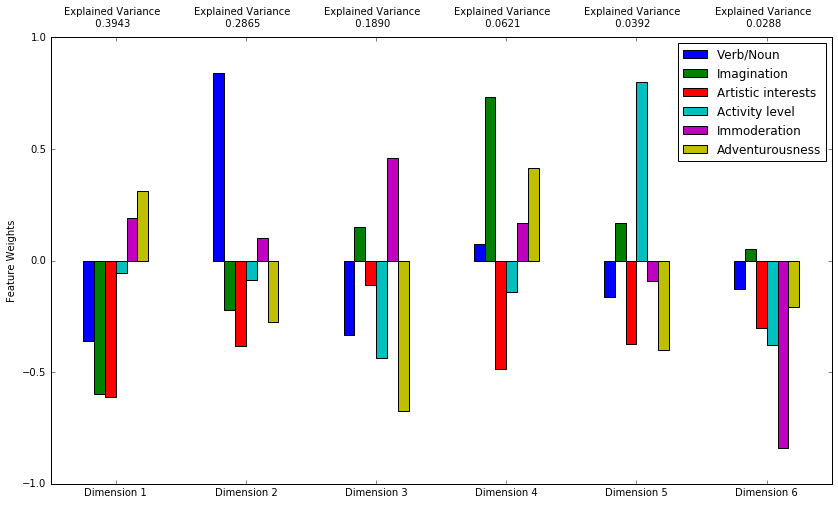

In [93]:
# PCA or principal component analysis can help us discover underlying factors
# on the evident features, associations between factors that may come from 
# common roots, by looking at this, we can associate groups of features
# that commonly act together, could be genre of the film, writer, etc.
from sklearn.decomposition import PCA
pca = PCA(n_components=6,whiten=True)
pca.fit(ndf)
pca_results = rs.pca_results(ndf,pca)

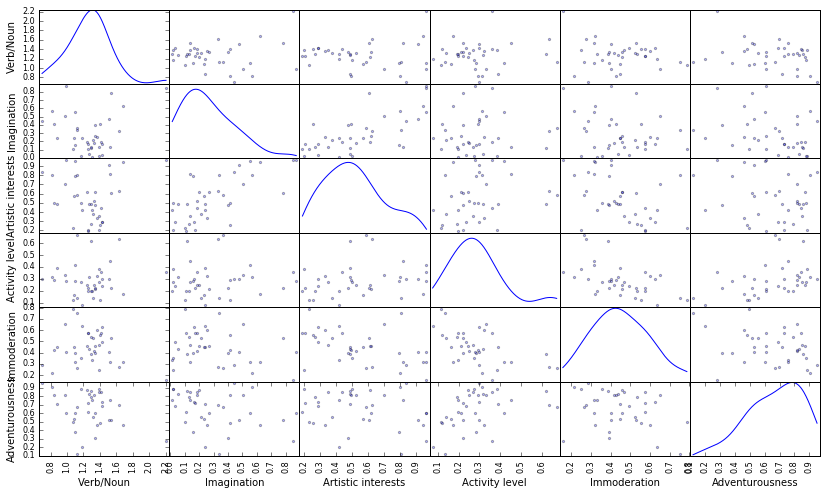

In [94]:
# Data visualization of the top 6 features affecting data regression,
# this plot shows relationship between features and shows the form
# of their distribution.
pd.scatter_matrix(ndf,alpha=0.3,figsize=(14,8),diagonal='kde')
plt.show()

In [104]:
# Prepare data, first by splitting the data into a training set
# and a test set, target should also be divided accordingly.
# Division should be done at random to avoid biases.
# Import libraries of regressors to use.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import r2_score
n      = 29  
index  = sorted(np.random.choice(range(38),size=29,replace=False))
nindex = []
for i in range(ndf.shape[0]):
    if i not in index:
        nindex.append(i)
        
# Calculate and returns the performance metric R^2 score 
# between true and predicted values based on the metric chosen.
def pm(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

# Fit and predict with random forest regressor, creates many decision trees,
# a forest, to split data gaining the most information possible by division.
clf = RandomForestRegressor(n_estimators=10)
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
rfrpred = clf.predict(ndf.ix[nindex])

# Linear regression is a linear polynomial fitting, assigning 
# linear value to each feature
clf = LinearRegression()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
lrpred = clf.predict(ndf.ix[nindex])

# Support vectors create divisions aiming to create the biggest 'gaps'
# between elements.
clf = SVR()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
svrpred = clf.predict(ndf.ix[nindex])

# Adaptative Boosting is an ensemble model that selects subsamples of
# the data and adapts for next iterations to the samples with less
# accuracy.
clf = ABR()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
abrpred = clf.predict(ndf.ix[nindex])

# KNN searches for the closest neighbors to create a prediction
# too many neighbors results in high bias, no few in high variance
clf = KNR()
clf.fit(ndf.ix[index],pd.Series(target['imdbRating'].ix[index]).ravel())
knrpred = clf.predict(ndf.ix[nindex])

# Use root mean square error to evaluate performance.
rmse = [0.,0.,0.,0.,0.,0.]

# Print values predict by the algorithm and the target value.
for i,j,k,l,m,n in zip(rfrpred,lrpred,svrpred,abrpred,knrpred,target['imdbRating'].ix[nindex]):
    rmse[0] += (i-n)**2
    rmse[1] += (j-n)**2
    rmse[2] += (k-n)**2
    rmse[3] += (l-n)**2
    rmse[4] += (m-n)**2
    rmse[5] += ((i+j+k+l+m)/5.-n)**2
    print 'RF: {}, LR: {:f}, SVM: {:f}, ABR: {:f}, KNR: {}, Mean: {:f}, Target: {}'.format(i,j,k,l,m,(i+j+k+l+m)/5.,n)
    
for i in range(len(rmse)):
    rmse[i] = (rmse[i]/len(nindex))**0.5
print '\nRMSE'
print 'RF: {:f}, LR: {:f}, SVM: {:f}, ABR: {:f}, KNR: {:f}, Mean: {:f}'.format(rmse[0],rmse[1],rmse[2],rmse[3],rmse[4],rmse[5])

RF: 5.43, LR: 7.131231, SVM: 6.582110, ABR: 6.111111, KNR: 5.96, Mean: 6.242890, Target: 6.0
RF: 6.41, LR: 6.461984, SVM: 6.660650, ABR: 6.210000, KNR: 5.7, Mean: 6.288527, Target: 4.5
RF: 5.25, LR: 5.996822, SVM: 6.517385, ABR: 5.600000, KNR: 6.26, Mean: 5.924841, Target: 6.0
RF: 7.13, LR: 7.085225, SVM: 6.897864, ABR: 7.138889, KNR: 6.36, Mean: 6.922396, Target: 6.9
RF: 6.52, LR: 6.377111, SVM: 6.685398, ABR: 6.525000, KNR: 6.08, Mean: 6.437502, Target: 5.6
RF: 6.27, LR: 6.541651, SVM: 6.796489, ABR: 7.125000, KNR: 6.44, Mean: 6.634628, Target: 7.5
RF: 5.72, LR: 6.353325, SVM: 6.607440, ABR: 5.907692, KNR: 5.86, Mean: 6.089691, Target: 5.6
RF: 5.49, LR: 6.030760, SVM: 6.641056, ABR: 5.770000, KNR: 6.24, Mean: 6.034363, Target: 6.5
RF: 8.2, LR: 7.333693, SVM: 7.205128, ABR: 7.946154, KNR: 8.54, Mean: 7.844995, Target: 8.8

RMSE
RF: 0.962762, LR: 1.034057, SVM: 1.081481, ABR: 0.782190, KNR: 0.610792, Mean: 0.822118


## Next steps:

The application has great potential to greatly improve its scores, this will be done by:
- Increasing the size of the dataset, that is, increasing the number of scripts analyzed.
- Find new custom features, particularly by analyzing the text through NLTK.
- Tunning the regression algorithms, try also xgboost and neural networks (always winners at Kaggle).
- Developing the web aplication with **Heroku**, so it can be used and tested.